# Sections 2B, 2C, and 2D

##### Section 2B: Total Breakdown
##### Section 2C: Ethnic Breakdown
##### Section 2D: Gender Breakdown


### Section 2B: Total Enrollment

Create spreadsheet to look at the overall total data to see if there are any trends by COVID as it related to enrollment in California school (K-12).

In [2]:
#load libraries needed for the notebook
library(dplyr)
library(tidyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
# Load in our dataframe from our .Rda file
df <- readRDS(file="Group7DataFrame.Rda")

In [4]:
#look at data for total enrolled / year in CA. 2021 had lowest enrollment in past several years
#Enrollment has been decresing over time
total_enroll <- df %>%
select(ENR_TOTAL, Year) %>%
group_by(Year) %>%
summarize(Total_Enroll = sum(ENR_TOTAL)) %>%
arrange(Year)

In [5]:
#add percent change per year for total enrolled
#Greatest percent change in enrollment was 2020-2021
total_enroll$Percent_Change <- ((total_enroll$Total_Enroll/lag(total_enroll$Total_Enroll)-1)*100)

In [6]:
total_enroll

Year,Total_Enroll,Percent_Change
<fct>,<int>,<dbl>
2015,6235520,NA
2016,6226737,-0.14085433
2017,6228235,0.02405754
2018,6220413,-0.12558935
2019,6186278,-0.54875778
2020,6163001,-0.37626825
2021,6002393,-2.60600315


Warning message:
“Removed 1 rows containing missing values (position_stack).”

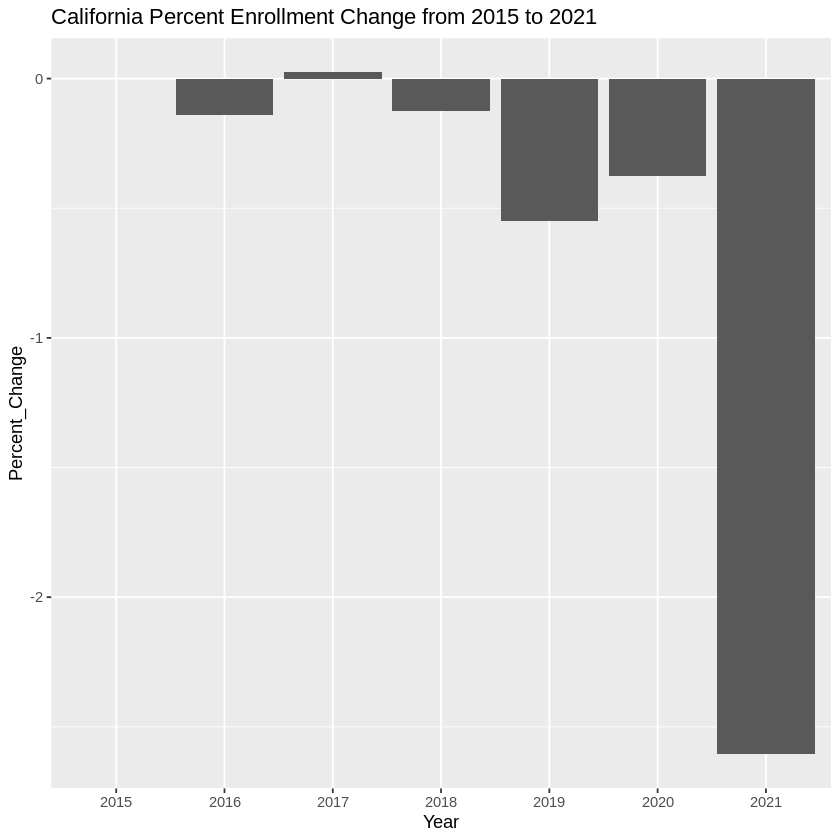

In [7]:
# Create a histogram using ggplot in order to display the percentage chare in enrollment across 2016-2021.Most years display
#a drop in enrollment with 2021 showing the largest drop.
ggplot(total_enroll, aes(x = Year, y = Percent_Change)) + geom_bar(stat = "identity") +
labs(title="California Percent Enrollment Change from 2015 to 2021")

In [8]:
#Find top 10 districts in terms of overall enrollment in CA
df10 <- df %>%
select(DISTRICT, ENR_TOTAL) %>%
group_by(DISTRICT) %>%
summarize(Total_Enroll = sum(ENR_TOTAL)) %>%
arrange(desc(Total_Enroll))

district_top_10 <- df10[1:10,] 
district_top_10

DISTRICT,Total_Enroll
<fct>,<int>
Los Angeles Unified,4320711
San Diego Unified,879143
Long Beach Unified,523561
Fresno Unified,512863
Elk Grove Unified,444357
San Francisco Unified,417801
Capistrano Unified,371631
Corona-Norco Unified,370421
San Bernardino City Unified,369987


### Section 2C: Ethnic Breakdown

Create spreadsheets and graphics to look at the data by different enthic groups to see if there are any trends, particularly any groups that were most affected or least affected by COVID as it related to enrollment in California school (K-12).  

In [9]:
#Graph by ethnic groups to see which was the most and least affected by COVID as it related to enrollment in schools
Ethnic_Total = df %>%                                        
  group_by(Year, ETHNIC) %>%  
  summarise(total = sum(ENR_TOTAL)) 


geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


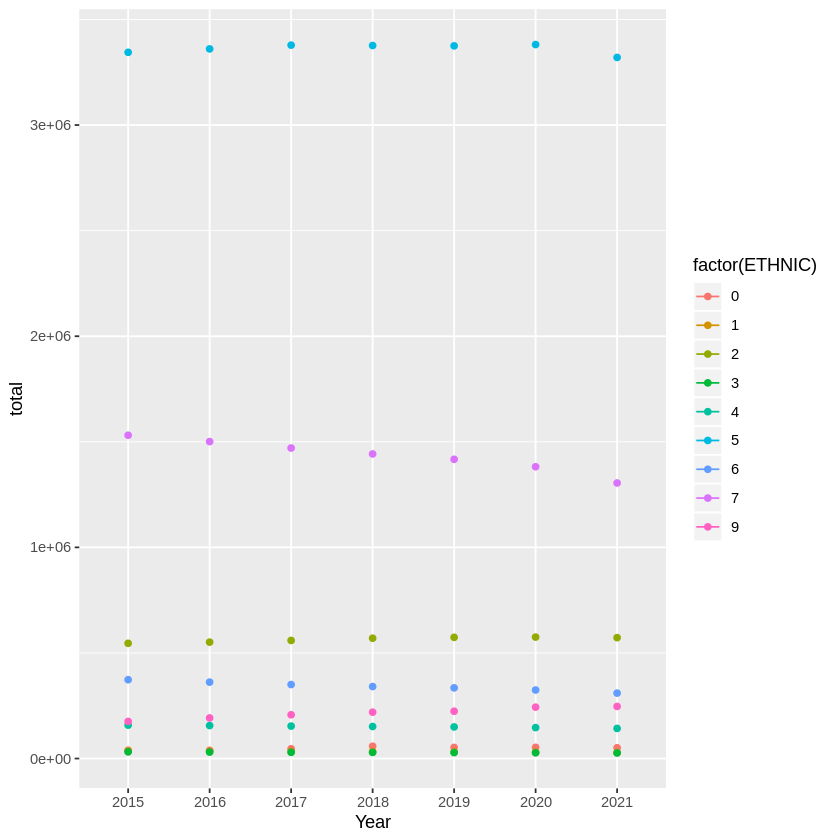

In [10]:
ggplot(Ethnic_Total, aes(Year, total, color=factor(ETHNIC))) + geom_point() + geom_line()


In [11]:
#Show in a spreadsheet the data of what appears to be the largest drop
Ethnic_Total %>% filter(ETHNIC=="7")

Year,ETHNIC,total
<fct>,<int>,<int>
2015,7,1531088
2016,7,1500932
2017,7,1470499
2018,7,1442388
2019,7,1417055
2020,7,1381737
2021,7,1304945


In [12]:
#Show in a spreadsheet the data of what appears to be the second largest drop
Ethnic_Total %>% filter(ETHNIC=="6")

Year,ETHNIC,total
<fct>,<int>,<int>
2015,6,373280
2016,6,361752
2017,6,350338
2018,6,340841
2019,6,334652
2020,6,324496
2021,6,309799


In [13]:
#filter for enrollment per ethnic group each year to analyze the trends

enroll_ethnic <- df %>%
select(ENR_TOTAL, Year, ETHNIC) %>%
group_by(ETHNIC, Year) %>%
summarize(Total_Enroll = round(sum(ENR_TOTAL))) %>%
mutate(Percent_Change = round((Total_Enroll/lag(Total_Enroll)-1)*100))

enroll_ethnic

ETHNIC,Year,Total_Enroll,Percent_Change
<int>,<fct>,<dbl>,<dbl>
0,2015,38809,NA
0,2016,38810,0
0,2017,46302,19
0,2018,58350,26
0,2019,52635,-10
0,2020,53153,1
0,2021,51052,-4
1,2015,36755,NA
1,2016,34704,-6


In [14]:
#ensure that each ethnic group is labeled / changed from numbers to labels
enroll_ethnic['ETHNIC'][enroll_ethnic['ETHNIC'] == '0'] <- 'Not reported'
enroll_ethnic['ETHNIC'][enroll_ethnic['ETHNIC'] == '1'] <- 'American Indian or Alaska Native'
enroll_ethnic['ETHNIC'][enroll_ethnic['ETHNIC'] == '2'] <- 'Asian'
enroll_ethnic['ETHNIC'][enroll_ethnic['ETHNIC'] == '3'] <- 'Pacific Islander'
enroll_ethnic['ETHNIC'][enroll_ethnic['ETHNIC'] == '4'] <- 'Filipino'
enroll_ethnic['ETHNIC'][enroll_ethnic['ETHNIC'] == '5'] <- 'Hispanic or Latino'
enroll_ethnic['ETHNIC'][enroll_ethnic['ETHNIC'] == '6'] <- 'African American'
enroll_ethnic['ETHNIC'][enroll_ethnic['ETHNIC'] == '7'] <- 'White'
enroll_ethnic['ETHNIC'][enroll_ethnic['ETHNIC'] == '9'] <- 'Two or More Races, Not Hispanic'

enroll_ethnic

ETHNIC,Year,Total_Enroll,Percent_Change
<chr>,<fct>,<dbl>,<dbl>
Not reported,2015,38809,NA
Not reported,2016,38810,0
Not reported,2017,46302,19
Not reported,2018,58350,26
Not reported,2019,52635,-10
Not reported,2020,53153,1
Not reported,2021,51052,-4
American Indian or Alaska Native,2015,36755,NA
American Indian or Alaska Native,2016,34704,-6


Warning message:
“Removed 9 rows containing missing values (position_stack).”

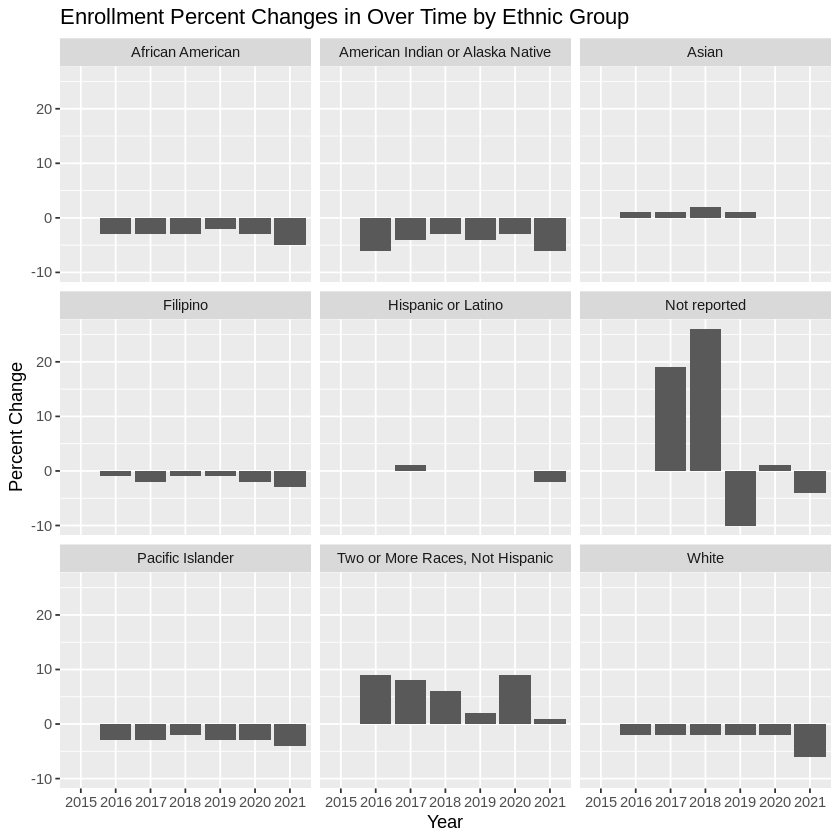

In [15]:
#Create a historgram per ethnic group to display the percent change in enrollment from 2016-2021 for each ethnic group 

ggplot(enroll_ethnic, aes(x = Year, y = Percent_Change)) + geom_bar(stat = "identity") + facet_wrap(~ETHNIC) +
ggtitle("Enrollment Percent Changes Over Time by Ethnic Group") + ylab("Percent Change")

White, african american,and american indian or alaska native saw greatest decrease in enrollment in 2021. Several groups experienced little to no change in enrollment over time. Hispanic or latino saw a decrease in 2021 after no changes for several years.

In [14]:
#total enrollment per year per ethnic group
#not reported
df_ethnic_0 <- subset(df, ETHNIC == 0)
df_ethnic_0 %>%
select(ENR_TOTAL, Year) %>%
group_by(Year) %>%
summarize(Total_Enroll = sum(ENR_TOTAL)) %>%
mutate(Percent_Change = (Total_Enroll/lag(Total_Enroll)-1)*100)


#total enrollment per year per ethnic group
#American Indian or Alaska Native, Not Hispanic
df_ethnic_1 <- subset(df, ETHNIC == 1)
df_ethnic_1 %>%
select(ENR_TOTAL, Year) %>%
group_by(Year) %>%
summarize(Total_Enroll = sum(ENR_TOTAL)) %>%
mutate(Percent_Change = (Total_Enroll/lag(Total_Enroll)-1)*100)

Year,Total_Enroll,Percent_Change
<fct>,<int>,<dbl>
2015,38809,NA
2016,38810,0.002576722
2017,46302,19.304303015
2018,58350,26.020474278
2019,52635,-9.794344473
2020,53153,0.984136031
2021,51052,-3.952740203


Year,Total_Enroll,Percent_Change
<fct>,<int>,<dbl>
2015,36755,NA
2016,34704,-5.580193
2017,33369,-3.846819
2018,32500,-2.604213
2019,31358,-3.513846
2020,30282,-3.431341
2021,28330,-6.446074


In [15]:
#total enrollment per year per ethnic group
#Asian, Not Hispanic
df_ethnic_2 <- subset(df, ETHNIC == 2)
df_ethnic_2 %>%
select(ENR_TOTAL, Year) %>%
group_by(Year) %>%
summarize(Total_Enroll = sum(ENR_TOTAL)) %>%
mutate(Percent_Change = (Total_Enroll/lag(Total_Enroll)-1)*100)


#total enrollment per year per ethnic group
#Pacific Islander, Not Hispanic
df_ethnic_3 <- subset(df, ETHNIC == 3)
df_ethnic_3 %>%
select(ENR_TOTAL, Year) %>%
group_by(Year) %>%
summarize(Total_Enroll = sum(ENR_TOTAL)) %>%
mutate(Percent_Change = (Total_Enroll/lag(Total_Enroll)-1)*100)

Year,Total_Enroll,Percent_Change
<fct>,<int>,<dbl>
2015,545720,NA
2016,551229,1.0094920
2017,559159,1.4386036
2018,569744,1.8930215
2019,573925,0.7338384
2020,575067,0.1989807
2021,572449,-0.4552513


Year,Total_Enroll,Percent_Change
<fct>,<int>,<dbl>
2015,31513,NA
2016,30436,-3.417637
2017,29384,-3.456433
2018,28920,-1.579091
2019,28085,-2.887275
2020,27195,-3.168951
2021,26239,-3.515352


In [16]:
#total enrollment per year per ethnic group
#Filipino, Not Hispanic
df_ethnic_4 <- subset(df, ETHNIC == 4)
df_ethnic_4 %>%
select(ENR_TOTAL, Year) %>%
group_by(Year) %>%
summarize(Total_Enroll = sum(ENR_TOTAL)) %>%
mutate(Percent_Change = (Total_Enroll/lag(Total_Enroll)-1)*100)

#total enrollment per year per ethnic group
#Hispanic or Latino
df_ethnic_5 <- subset(df, ETHNIC == 5)
df_ethnic_5 %>%
select(ENR_TOTAL, Year) %>%
group_by(Year) %>%
summarize(Total_Enroll = sum(ENR_TOTAL)) %>%
mutate(Percent_Change = (Total_Enroll/lag(Total_Enroll)-1)*100)

Year,Total_Enroll,Percent_Change
<fct>,<int>,<dbl>
2015,158224,NA
2016,156166,-1.300688
2017,153670,-1.598299
2018,151650,-1.314505
2019,149680,-1.299044
2020,146501,-2.123864
2021,142645,-2.632064


Year,Total_Enroll,Percent_Change
<fct>,<int>,<dbl>
2015,3344431,NA
2016,3360562,0.48232420
2017,3378344,0.52913769
2018,3376591,-0.05188933
2019,3374921,-0.04945817
2020,3381198,0.18598954
2021,3320223,-1.80335491


In [17]:
#total enrollment per year per ethnic group
#African American, not Hispanic

df_ethnic_6 <- subset(df, ETHNIC == 6)
df_ethnic_6 %>%
select(ENR_TOTAL, Year) %>%
group_by(Year) %>%
summarize(Total_Enroll = sum(ENR_TOTAL)) %>%
mutate(Percent_Change = (Total_Enroll/lag(Total_Enroll)-1)*100)


#total enrollment per year per ethnic group
#White, not Hispanic
df_ethnic_7 <- subset(df, ETHNIC == 7)
df_ethnic_7 %>%
select(ENR_TOTAL, Year) %>%
group_by(Year) %>%
summarize(Total_Enroll = sum(ENR_TOTAL)) %>%
mutate(Percent_Change = (Total_Enroll/lag(Total_Enroll)-1)*100)


#total enrollment per year per ethnic group
#Two or More Races, Not Hispanic
df_ethnic_9 <- subset(df, ETHNIC == 9)
df_ethnic_9 %>%
select(ENR_TOTAL, Year) %>%
group_by(Year) %>%
summarize(Total_Enroll = sum(ENR_TOTAL)) %>%
mutate(Percent_Change = (Total_Enroll/lag(Total_Enroll)-1)*100)

Year,Total_Enroll,Percent_Change
<fct>,<int>,<dbl>
2015,373280,NA
2016,361752,-3.088298
2017,350338,-3.155200
2018,340841,-2.710811
2019,334652,-1.815803
2020,324496,-3.034794
2021,309799,-4.529178


Year,Total_Enroll,Percent_Change
<fct>,<int>,<dbl>
2015,1531088,NA
2016,1500932,-1.969580
2017,1470499,-2.027607
2018,1442388,-1.911664
2019,1417055,-1.756324
2020,1381737,-2.492352
2021,1304945,-5.557642


Year,Total_Enroll,Percent_Change
<fct>,<int>,<dbl>
2015,175700,NA
2016,192146,9.360273
2017,207170,7.819054
2018,219429,5.917363
2019,223967,2.068095
2020,243372,8.664223
2021,246711,1.371974


In [18]:
#filter for the largest districts and look at ethnic groups
district_ethnic_data <- df %>%
select(ETHNIC, DISTRICT, Year, ENR_TOTAL) %>%
group_by(ETHNIC, DISTRICT, Year) %>%
summarize(Total_Enroll = sum(ENR_TOTAL)) %>%
mutate(Percent_Change = (Total_Enroll/lag(Total_Enroll)-1)*100) 

district_ethnic_data <- filter(district_ethnic_data, DISTRICT == 'Los Angeles Unified'| DISTRICT == 'San Diego Unified' |
                       DISTRICT == 'Long Beach Unified' | DISTRICT == 'Fresno Unified' | DISTRICT == 'Elk Grove Unified')

head(district_ethnic_data)

ETHNIC,DISTRICT,Year,Total_Enroll,Percent_Change
<int>,<fct>,<fct>,<int>,<dbl>
0,Elk Grove Unified,2015,29,NA
0,Elk Grove Unified,2016,22,-24.13793
0,Elk Grove Unified,2017,12,-45.45455
0,Elk Grove Unified,2019,12,0.00000
0,Elk Grove Unified,2020,4,-66.66667
0,Elk Grove Unified,2021,6,50.00000


### Section 2D: Gender Breakdown

Create spreadsheets and graphics to look at the data by different genders to see if there are any trends, particularly any gender that was most affected or least affected by COVID as it related to enrollment in California school (K-12).  

In [19]:
#Gender differences per year 
#No major difference as expected
enroll_gender <- df %>%
select(ENR_TOTAL, Year, GENDER) %>%
group_by(GENDER, Year) %>%
summarize(Total_Enroll = sum(ENR_TOTAL)) %>%
mutate(Percent_Change = (Total_Enroll/lag(Total_Enroll)-1)*100)

enroll_gender

GENDER,Year,Total_Enroll,Percent_Change
<fct>,<fct>,<int>,<dbl>
F,2015,3030814,NA
F,2016,3027147,-0.120990599
F,2017,3027112,-0.001156204
F,2018,3024441,-0.088235916
F,2019,3008055,-0.541786069
F,2020,2995926,-0.403217361
F,2021,2920227,-2.526731301
M,2015,3204706,NA
M,2016,3199590,-0.159640229


geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


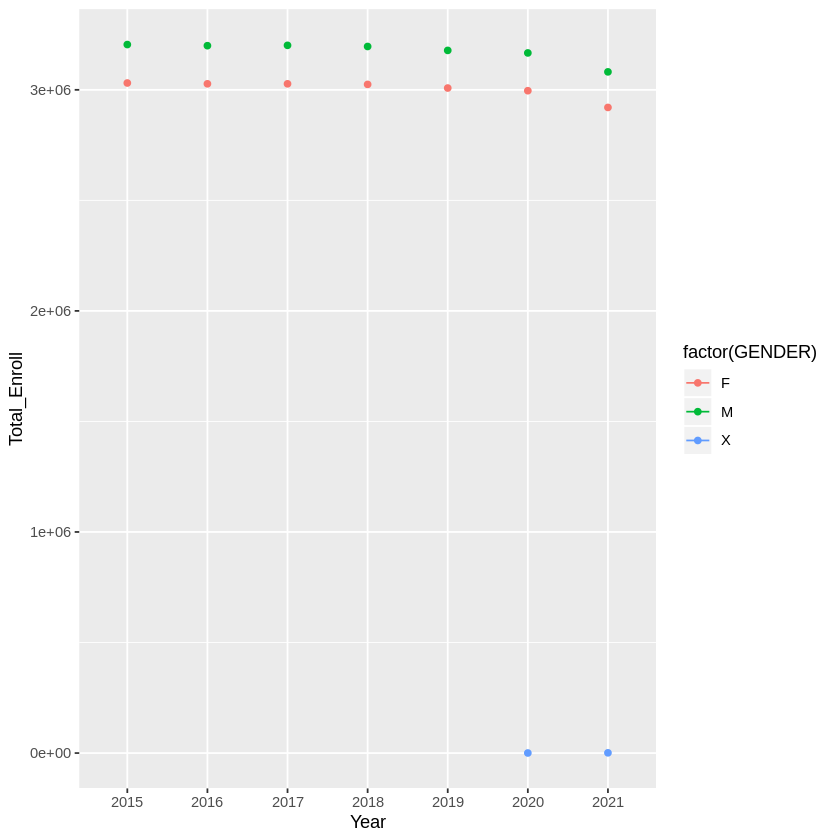

In [20]:
## Create a line graph showing the entrollment totals by gender across 2015 to 2021. At least visually it appears that there
##are no major differences by gender in enrollment total.

ggplot(enroll_gender, aes(Year, Total_Enroll, color=factor(GENDER))) + geom_point() + geom_line()


In [21]:
#Save out our dataframe to an .Rda file

saveRDS(df,file="Group7DataFrame.Rda")
